
# El Iris Dataset

 Este conjunto consta de 3 tipos diferentes de flores'
(Setosa, Versicolor, and Virginica) con datos de petalos y sepalos
( longitud y anchura ), almacenados en una matriz 150 x 4 .

Las filas son los elementos de la muestra y las columnas son:
Longitud de Sépalo ,Ancho de Sépalo, Longitud de Pétalo y Ancho de Pétalo.


Automatically created module for IPython interactive environment


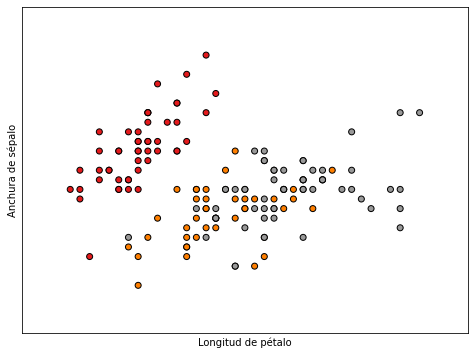

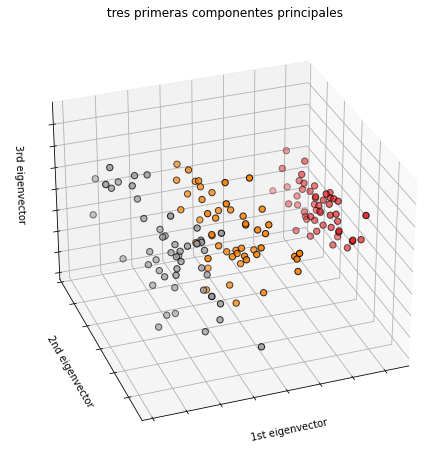

Accuracy of RFClassifier on training set: 0.97
Accuracy of RFClassifier on test set: 0.97
[[13  0  0]
 [ 0 15  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      1.00      0.97        15
           2       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

Accuracy of NNClassifier on training set: 0.97
Accuracy of NNClassifier on test set: 0.97
[[13  0  0]
 [ 0 15  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      1.00      0.97        15
           2       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      

C:\Users\gayar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [1]:
print(__doc__)


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import cm




########################################################################################### importamos los datos
iris = datasets.load_iris()

X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

##################################################################################### vamos a gráficar los datos

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

##########################################################################################   Settings del gráfico

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Longitud de pétalo')
plt.ylabel('Anchura de sépalo')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
#################################################################################################################
###################### Aproximación visual al conjunto ##########################################################
#### para visualizar utilizamos 3 primeras PCA y tener así un gráfico en tres dimensiones         ###############
##### nos puede dar una idea de como de separables son las tres clases en función de la información aportada ####

#################################################################################################################

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title(" tres primeras componentes principales")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

####################################################################### Módulo de clasificación con RandomForest :

X=iris.data[:,:4]
y=iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

clf1 = RandomForestClassifier(n_estimators=50,max_features=2,max_depth=2).fit(X_train, y_train)
probicted1=clf1.predict(X_test)


# Resultados resumen de nuestro clasificador . 


print('Accuracy of RFClassifier on training set: {:.2f}'.format(clf1.score(X_train, y_train)))
print('Accuracy of RFClassifier on test set: {:.2f}'.format(clf1.score(X_test, y_test)))
print(confusion_matrix(probicted1,y_test))
print(classification_report(probicted1,y_test))


#################################################################################### Módulo Perceptrón Multicapa  :

scaler = MinMaxScaler()

X=iris.data[:,:4]
y=iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

clf2 = MLPClassifier(hidden_layer_sizes = [100,100], alpha = 0.0001,activation='relu',
                   random_state = 0, solver='adam').fit(X_train_scaled, y_train)



probicted2=clf2.predict(X_test_scaled)


# Resultados resumen de nuestro clasificador . 


print('Accuracy of NNClassifier on training set: {:.2f}'.format(clf2.score(X_train_scaled, y_train)))
print('Accuracy of NNClassifier on test set: {:.2f}'.format(clf2.score(X_test_scaled, y_test)))
print(confusion_matrix(probicted2,y_test))       
print(classification_report(probicted2,y_test))    

############################################################################### Módulo Support Vector Machine  :

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

scaler=MinMaxScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


svm = SVC(kernel='linear',gamma=1,C=1).fit(X_train_scaled, y_train)



probicted3=svm.predict(X_test_scaled)


# Resultados resumen de nuestro clasificador . 


print('Accuracy of SVMClassifier on training set: {:.2f}'.format(svm.score(X_train_scaled, y_train)))
print('Accuracy of SVMClassifier on test set: {:.2f}'.format(svm.score(X_test_scaled, y_test)))
print(confusion_matrix(probicted3,y_test))
print(classification_report(probicted3,y_test))
    
    
    










In [49]:
################################################################################################################
######  Conclusión : este conjunto queda perfectamente clasificado con los características recogidas ###########
######  queda no obstante una mínima indefinición entre las clases 1 y 2 que no se ha logrado corregir 
#####   con ninguno de los tres clasificadores elegidos ( RF, NN, SVM )     ####################################                    
################################################################################################################